#0. Airline Delay Data Imputation

In [77]:
import pandas as pd
df = pd.read_csv('/content/Airlines.csv')
print(df.head(10))
print(df.tail(10))

#Link : https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay?resource=download

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0
5   6      CO    1094         LAX       IAH          3    30     181      1
6   7      DL    1768         LAX       MSP          3    30     220      0
7   8      DL    2722         PHX       DTW          3    30     228      0
8   9      DL    2606         SFO       MSP          3    35     216      1
9  10      AA    2538         LAS       ORD          3    40     200      1
            id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
539373  539374      B6     480         LAX       BOS          5  1435     320   
53

#1. Data Inspection


In [78]:
print("1. Dataset Shape:", df.shape)
print("\n2. Dataset types:", df.dtypes)
print("\n\n3.Basic Statistics",df.describe())

numerical_column_stat = pd.DataFrame({
    'Variable': ['DayOfWeek', 'Time', 'Length', 'Delay'],
    'Mean': [df['DayOfWeek'].mean(), df['Time'].mean(), df['Length'].mean(), df['Delay'].mean()],
    'Std' : [df['DayOfWeek'].std(), df['Time'].std(), df['Length'].std(), df['Delay'].std()],
    'Min': [df['DayOfWeek'].min(), df['Time'].min(), df['Length'].min(), df['Delay'].min()],
    'Max': [df['DayOfWeek'].max(), df['Time'].max(), df['Length'].max(), df['Delay'].max()],
    'Median': [df['DayOfWeek'].median(), df['Time'].median(), df['Length'].median(), df['Delay'].median()],
})

numerical_column_stat.to_csv('numerical_column_stat.csv', index=False)

print("\n\n4. Statistics summary table (ID and Flight number have been removed since they are useless)")
pd.read_csv('/content/numerical_column_stat.csv')



1. Dataset Shape: (539383, 9)

2. Dataset types: id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object


3.Basic Statistics                  id         Flight      DayOfWeek           Time  \
count  539383.00000  539383.000000  539383.000000  539383.000000   
mean   269692.00000    2427.928630       3.929668     802.728963   
std    155706.60446    2067.429837       1.914664     278.045911   
min         1.00000       1.000000       1.000000      10.000000   
25%    134846.50000     712.000000       2.000000     565.000000   
50%    269692.00000    1809.000000       4.000000     795.000000   
75%    404537.50000    3745.000000       5.000000    1035.000000   
max    539383.00000    7814.000000       7.000000    1439.000000   

              Length          Delay  
count  539383.000000  539383.000000  
mean      132.202007       0.

,Variable,Mean,Std,Min,Max,Median
0,DayOfWeek,3.929668,1.914664,1,7,4.0
1,Time,802.728963,278.045911,10,1439,795.0
2,Length,132.202007,70.117016,0,655,115.0
3,Delay,0.445442,0.497015,0,1,0.0


#2. Data Cleaning

###2-1.Find missing values and duplicated values

In [79]:
print("\n1.Missing Values:\n")
print(df.isnull().sum())
print("\n\n2.Duplicate Values:\n")
print(df.duplicated().sum())
print("\n\n3.Drop the unnecessary column(id)")
df.drop('id', axis=1, inplace=True)
print(df.head())


1.Missing Values:

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64


2.Duplicate Values:

0


3.Drop the unnecessary column(id)
  Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0      CO     269         SFO       IAH          3    15     205      1
1      US    1558         PHX       CLT          3    15     222      1
2      AA    2400         LAX       DFW          3    20     165      1
3      AA    2466         SFO       DFW          3    20     195      1
4      AS     108         ANC       SEA          3    30     202      0


###2-2.Renaming and adding the columns

In [80]:
#1. Rename the column so that we can interpret easily
df = df.rename(columns={
    'Time': 'departure_minutes',
    'Length': 'duration_minutes',
    'Delay': 'departure_delay',
})

# 2. Create a NEW column for day name
df['DayName'] = df['DayOfWeek'].map({
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat',
    7: 'Sun'
})

# 3. Add DepartureFormatted that converts departure minutes to time
df['DepartureFormatted'] = df['departure_minutes'].apply(lambda x: f"{x // 60:02d}:{x % 60:02d}")


#4. Add DurationFormatted that converts flight duration minutes to hours and minutes
df['DurationFormatted'] = df['duration_minutes'].apply(
    lambda x: f"{int(x//60)}h {int(x%60)}m" if x >= 60 else f"{int(x)}m"
)

#5. Add time_period that labels departure_minutes as 'Early Morning', 'Morning', 'Afternoon', 'Evening'
df['departure_tp'] = pd.cut(df['departure_minutes'],
                            bins=[0, 360, 720, 1080, 1440],
                            labels=['Early Morning', 'Morning', 'Afternoon', 'Evening'])

#6. Add flight_length that labels duration_minutes as 'Short', 'Medium', 'Long', 'Very Long'
df['flight_length'] = pd.cut(df['duration_minutes'],
                              bins=[0, 60, 180, 360, 700],
                              labels=['Short', 'Medium', 'Long', 'Very Long'])

#7.Add delay_status column that specify status as the On-Time flight and Delayed flight
df['delay_status'] = df['departure_delay'].map({0:'On-Time', 1: 'Delayed'})

print(df)

df['flight_length'].value_counts()

       Airline  Flight AirportFrom AirportTo  DayOfWeek  departure_minutes  \
0           CO     269         SFO       IAH          3                 15   
1           US    1558         PHX       CLT          3                 15   
2           AA    2400         LAX       DFW          3                 20   
3           AA    2466         SFO       DFW          3                 20   
4           AS     108         ANC       SEA          3                 30   
...        ...     ...         ...       ...        ...                ...   
539378      CO     178         OGG       SNA          5               1439   
539379      FL     398         SEA       ATL          5               1439   
539380      FL     609         SFO       MKE          5               1439   
539381      UA      78         HNL       SFO          5               1439   
539382      US    1442         LAX       PHL          5               1439   

        duration_minutes  departure_delay DayName DepartureForm

,count
flight_length,
Medium,397653
Long,90129
Short,45178
Very Long,6419


#3. Statistical Data Inspection

#Q1. What are the characteristics of delayed flights?
###: For example, which airline experiences the most delays, which airports have the highest delay rates, how delays vary by day of the week, what time period has the most delays, and whether flight length (short vs. long) affects delay likelihood.

In [81]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [82]:
# 1. Airport Delay
print(df['AirportFrom'].unique())
print(len(df['AirportFrom'].unique()))

airport_delay = df.groupby('AirportFrom').agg({
    'delay_status': lambda x: (x == 'Delayed').sum(),
    'Flight': 'count'
})

#Rename the columns
airport_delay.columns = ['Delayed_Count', 'Total_Flights']
airport_delay['Delay_Rate'] = (
    airport_delay['Delayed_Count'] / airport_delay['Total_Flights'] * 100
).round(2)

airport_delay['Delay_Rate'] = airport_delay['Delay_Rate'].astype(str) + '%'

# Sort by delay rate
airport_delay = airport_delay.sort_values('Delay_Rate', ascending=False)

print("\nTop 20 Worst Airports:")
print(airport_delay.head(20))

print("\nTop 20 Best Airports:")
print(airport_delay.tail(20))

['SFO' 'PHX' 'LAX' 'ANC' 'LAS' 'SLC' 'DEN' 'ONT' 'FAI' 'BQN' 'PSE' 'HNL'
 'BIS' 'IYK' 'EWR' 'BOS' 'MKE' 'GFK' 'OMA' 'GSO' 'LMT' 'SEA' 'MCO' 'TPA'
 'DLH' 'MSP' 'FAR' 'MFE' 'MSY' 'VPS' 'BWI' 'MAF' 'LWS' 'RST' 'ALB' 'DSM'
 'CHS' 'MSN' 'JAX' 'SAT' 'PNS' 'BHM' 'LIT' 'SAV' 'BNA' 'ICT' 'ECP' 'DHN'
 'MGM' 'CAE' 'PWM' 'ACV' 'EKO' 'PHL' 'ATL' 'PDX' 'RIC' 'BTR' 'HRL' 'MYR'
 'TUS' 'SBN' 'CAK' 'TVC' 'CLE' 'ORD' 'DAY' 'MFR' 'BTV' 'TLH' 'TYS' 'DFW'
 'FLL' 'AUS' 'CHA' 'CMH' 'LRD' 'BRO' 'CRP' 'LAN' 'PVD' 'FWA' 'JFK' 'LGA'
 'OKC' 'PIT' 'PBI' 'ORF' 'DCA' 'AEX' 'SYR' 'SHV' 'VLD' 'BDL' 'FAT' 'BZN'
 'RDM' 'LFT' 'IPL' 'EAU' 'ERI' 'BUF' 'IAH' 'MCI' 'AGS' 'ABI' 'GRR' 'LBB'
 'CLT' 'LEX' 'MBS' 'MOD' 'AMA' 'SGF' 'AZO' 'ABE' 'SWF' 'BGM' 'AVP' 'FNT'
 'GSP' 'ATW' 'ITH' 'TUL' 'COS' 'ELP' 'ABQ' 'SMF' 'STL' 'IAD' 'DTW' 'RDU'
 'RSW' 'OAK' 'ROC' 'IND' 'CVG' 'MDW' 'SDF' 'ABY' 'TRI' 'XNA' 'ROA' 'MLI'
 'LYH' 'EVV' 'HPN' 'FAY' 'EWN' 'CSG' 'GPT' 'MLU' 'MOB' 'OAJ' 'CHO' 'ILM'
 'BMI' 'PHF' 'ACY' 'JAN' 'CID' 'GRK' 'HOU' 'CRW' 'H

In [83]:
#2. Airline Analysis

print(df['Airline'].unique())
print(len(df['Airline'].unique()))

#Find all airlines
all_airlines = df['Airline'].unique()
print(f"Total airlines found: {len(all_airlines)}")
print(all_airlines)

# Get active airlines
inactive_airlines = ['CO', 'US', 'FL', 'XE', 'OH']
active_airlines = [airline for airline in all_airlines if airline not in inactive_airlines]

# Filter and calculate
df_active = df[df['Airline'].isin(active_airlines)]

airline_delay = df_active.groupby('Airline').agg({
    'delay_status': lambda x: (x == 'Delayed').sum(),
    'Flight': 'count'
})

airline_delay.columns = ['Delayed_Count', 'Total_Flights']
airline_delay['Delay_Rate'] = (airline_delay['Delayed_Count'] / airline_delay['Total_Flights'] * 100).round(2)
airline_delay = airline_delay.sort_values('Delay_Rate', ascending=False)

print("\nTop 10 Worst Airline Delay Rates:")
print(airline_delay.head(10))

print("\nTop 10 Best Airline Delay Rates:")
print(airline_delay.tail(10))

['CO' 'US' 'AA' 'AS' 'DL' 'B6' 'HA' 'OO' '9E' 'OH' 'EV' 'XE' 'YV' 'UA'
 'MQ' 'FL' 'F9' 'WN']
18
Total airlines found: 18
['CO' 'US' 'AA' 'AS' 'DL' 'B6' 'HA' 'OO' '9E' 'OH' 'EV' 'XE' 'YV' 'UA'
 'MQ' 'FL' 'F9' 'WN']

Top 10 Worst Airline Delay Rates:
         Delayed_Count  Total_Flights  Delay_Rate
Airline                                          
WN               65657          94097       69.78
B6                8459          18112       46.70
OO               22760          50254       45.29
DL               27452          60940       45.05
F9                2899           6456       44.90
EV               11255          27983       40.22
9E                8226          20686       39.77
AA               17736          45656       38.85
MQ               12742          36605       34.81
AS                3892          11471       33.93

Top 10 Best Airline Delay Rates:
         Delayed_Count  Total_Flights  Delay_Rate
Airline                                          
DL               

In [97]:
#3.Which day has more delays

day_delay = df.groupby('DayName').agg({
    'delay_status': lambda x: (x == 'Delayed').sum(),
    'Flight': 'count'
})
#Rename the columns
day_delay.columns = ['Delayed_Count', 'Total_Flights']

#Delay rate % calculation
day_delay['Delay_Rate'] = (
    day_delay['Delayed_Count'] / day_delay['Total_Flights'] * 100
).round(2)

day_delay['Delay_Rate'] = day_delay['Delay_Rate'].astype(str) + '%'

# Put days in order (Mon → Sun)
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_delay = day_delay.reindex(day_order)

print("\nDelay Rates by Day:")
print(day_delay)

['Wed' 'Thu' 'Fri' 'Sat' 'Sun' 'Mon' 'Tue']
7

Delay Rates by Day:
         Delayed_Count  Total_Flights Delay_Rate
DayName                                         
Mon              34030          72769     46.76%
Tue              31913          71340     44.73%
Wed              42254          89746     47.08%
Thu              41244          91445      45.1%
Fri              35515          85248     41.66%
Sat              23615          58956     40.06%
Sun              31693          69879     45.35%


In [98]:
#4. What time has most delays

# Group by time period
time_delay = df.groupby('departure_tp').agg({
    'delay_status': lambda x: (x == 'Delayed').sum(),
    'Flight': 'count'
})

#Rename the columns
time_delay.columns = ['Delayed_Count', 'Total_Flights']

#Delay Rate calculation
time_delay['Delay_Rate'] = (time_delay['Delayed_Count'] /
                            time_delay['Total_Flights'] * 100).round(2)
time_delay['Delay_Rate'] = time_delay['Delay_Rate'].astype(str) + '%'

#Sort it
time_delay = time_delay.sort_values('Delay_Rate', ascending=False)

print("\nDelay Rates by Time Period:")
print(time_delay)

['Early Morning', 'Morning', 'Afternoon', 'Evening']
Categories (4, object): ['Early Morning' < 'Morning' < 'Afternoon' < 'Evening']
4

Delay Rates by Time Period:
               Delayed_Count  Total_Flights Delay_Rate
departure_tp                                          
Evening                53952         105003     51.38%
Afternoon             103735         206704     50.19%
Morning                78249         210716     37.13%
Early Morning           4328          16960     25.52%


/tmp/ipython-input-2319041231.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_delay = df.groupby('departure_tp').agg({


In [86]:
# 5. Does flight length matter?

# Group by flight length
length_delay = df.groupby('flight_length').agg({
    'delay_status': lambda x: (x == 'Delayed').sum(),
    'Flight': 'count'
})
#Rename the columns
length_delay.columns = ['Delayed_Count', 'Total_Flights']
length_delay['Delay_Rate'] = (length_delay['Delayed_Count'] / length_delay['Total_Flights'] * 100).round(2)

#Dealy Rate calculation %
length_delay['Delay_Rate'] = length_delay['Delay_Rate'].astype(str) + '%'

#Sort it
length_delay = length_delay.sort_values('Delay_Rate', ascending=False)

print("\nDelay Rates by Flight Length:")
print(length_delay)


Delay Rates by Flight Length:
               Delayed_Count  Total_Flights Delay_Rate
flight_length                                         
Long                   45092          90129     50.03%
Very Long               2880           6419     44.87%
Medium                173654         397653     43.67%
Short                  18637          45178     41.25%


/tmp/ipython-input-2579104015.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_delay = df.groupby('flight_length').agg({


In [87]:
#6. Is this statistically right?

categories = {
    'Airline': 'Airline',
    'Day of Week': 'DayName',
    'Time Period': 'departure_tp',
    'Flight Length': 'flight_length'
}

results = []

for name, column in categories.items():
  table = pd.crosstab(df[column], df['delay_status'])
  chi2, p_value, dof, expected = stats.chi2_contingency(table)
  significant = "Yes" if p_value < 0.05 else "No"

  results.append({
      'Category': name,
      'Chi-Square Statistic': chi2,
      'P-Value': p_value,
      'Significant': significant
  })
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Chi-Square Statistic', ascending=False)

print(results_df)

# Since the p-value is below 0.05, the associations are statistically significant,
# suggesting that all examined factors are related to flight delays.
# Based on the chi-square values, the strength of association decreases in the
# following order: Airline - Time Period - Flight Length - Day of Week.


        Category  Chi-Square Statistic        P-Value Significant
0        Airline          38193.570601   0.000000e+00         Yes
2    Time Period          11818.023265   0.000000e+00         Yes
3  Flight Length           1419.763791  1.515527e-307         Yes
1    Day of Week           1178.120745  2.600728e-251         Yes


#Q2. What is the overall distribution of our dataset?
###This question helps verify the assumptions from Q1.
###In other words, are the characteristics we identified in Q1 truly specific to delayed flights, or are they simply reflecting the underlying distribution of the entire dataset?
###For example, if Airport A appears to have the most delays, is it because Airport A genuinely has more delayed flights — or because our dataset contains a disproportionately large number of flights from Airport A?

In [88]:
#Q2. What is the overall distribution of our dataset?
#This question helps verify the assumptions from Q1.
#In other words, are the characteristics we identified in Q1 truly specific to delayed flights, or are they simply reflecting the underlying distribution of the entire dataset?
#For example, if Airport A appears to have the most delays, is it because Airport A genuinely has more delayed flights — or because our dataset contains a disproportionately large number of flights from Airport A?

#1.Airline Distribution
print("\n\n1.Airline Distribution")
airline_dist = df['Airline'].value_counts()
airline_pct = df['Airline'].value_counts(normalize=True)*100
airline_summary = pd.DataFrame({
    'Count': airline_dist,
    'Percentage': airline_pct}).round(2)
print(airline_summary)

#2.Origin Airport Distribution
print("\n\n2.Origin Airport Distribution")
airport_from_dist = df['AirportFrom'].value_counts().head(15)
airport_from_pct = df['AirportFrom'].value_counts(normalize=True).head(15)*100
airport_from_summary = pd.DataFrame({
    'Count': airport_from_dist,
    'Percentage': airport_from_pct}).round(2)
print(airport_from_summary)

#3. Destination Airport Distribution
print("\n\n3. Destination Airport Distribution")
airport_to_dist = df['AirportTo'].value_counts().head(15)
airport_to_pct = df['AirportTo'].value_counts(normalize=True).head(15) * 100
airport_to_summary = pd.DataFrame({
    'Flight_Count': airport_to_dist,
    'Percentage': airport_to_pct
}).round(2)
print(airport_to_summary)

#4.Day of Week Distribution
print("\n\n4.DAY OF Week Distribution ")
day_dist = df['DayName'].value_counts()
day_pct = df['DayName'].value_counts(normalize=True) * 100
day_summary = pd.DataFrame({
    'Count': day_dist,
    'Percentage': day_pct
}).round(2)
print(day_summary)


#5.Flight Length
print("\n\n5.Flight Length Distribution")
length_dist = df['flight_length'].value_counts()
length_pct = df['flight_length'].value_counts(normalize=True) * 100
length_summary = pd.DataFrame({
    'Flight_Count': length_dist,
    'Percentage': length_pct
}).round(2)
print(length_summary)

#6.Delay Status
print("\n\n6.Delay Status Distribution")
delay_dist = df['delay_status'].value_counts()
delay_pct = df['delay_status'].value_counts(normalize=True) * 100
delay_summary = pd.DataFrame({
    'Flight_Count': delay_dist,
    'Percentage': delay_pct
}).round(2)
print(delay_summary)




1.Airline Distribution
         Count  Percentage
Airline                   
WN       94097       17.45
DL       60940       11.30
OO       50254        9.32
AA       45656        8.46
MQ       36605        6.79
US       34500        6.40
XE       31126        5.77
EV       27983        5.19
UA       27619        5.12
CO       21118        3.92
FL       20827        3.86
9E       20686        3.84
B6       18112        3.36
YV       13725        2.54
OH       12630        2.34
AS       11471        2.13
F9        6456        1.20
HA        5578        1.03


2.Origin Airport Distribution
             Count  Percentage
AirportFrom                   
ATL          34449        6.39
ORD          24822        4.60
DFW          22154        4.11
DEN          19843        3.68
LAX          16657        3.09
IAH          15821        2.93
PHX          15557        2.88
DTW          13136        2.44
LAS          11918        2.21
SFO          11786        2.19
CLT          11133        2.06


#Visualizaions

In [89]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

###1.Airport

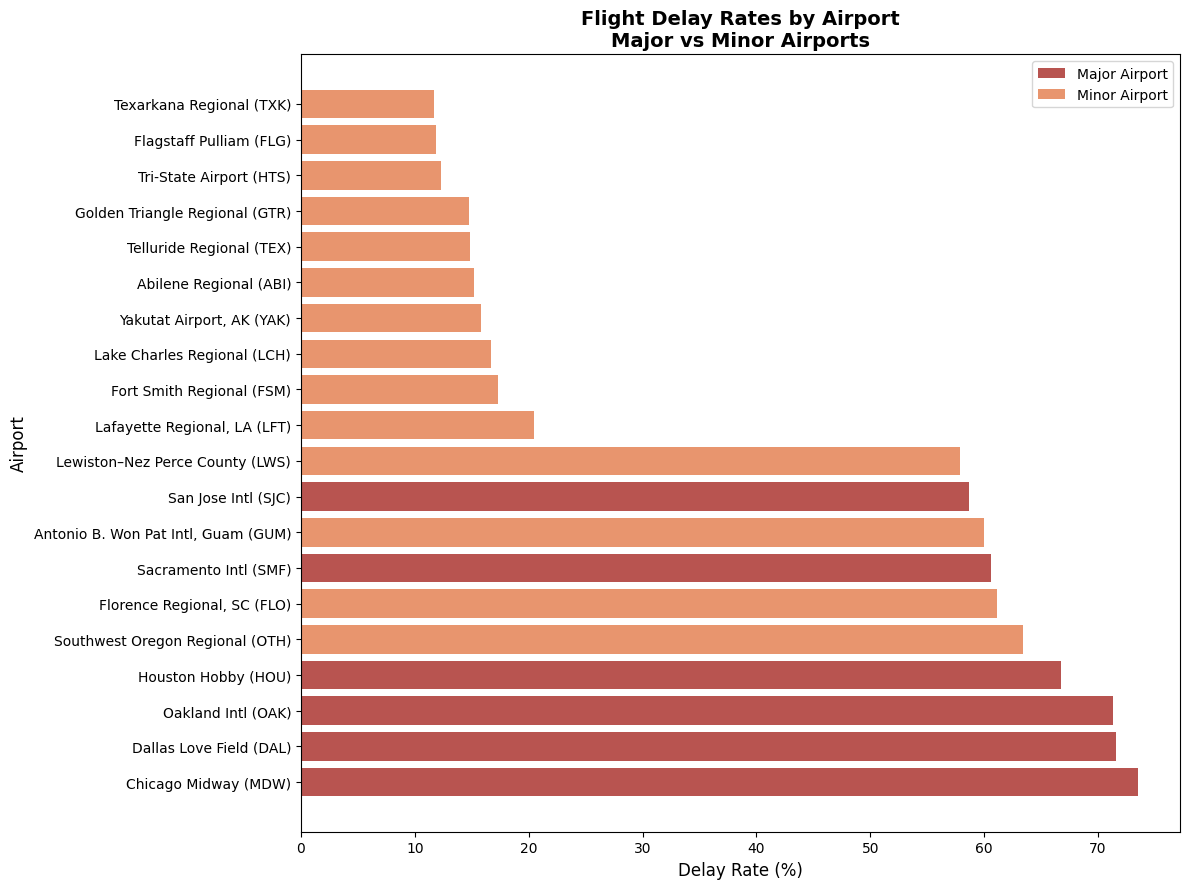

In [90]:

# Major airports (hub airports with high traffic)
major_airports = ['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'SEA', 'LAS', 'MCO', 'EWR',
                  'CLT', 'PHX', 'IAH', 'MIA', 'BOS', 'MSP', 'DTW', 'PHL', 'LGA', 'FLL',
                  'BWI', 'SLC', 'DCA', 'MDW', 'SAN', 'HNL', 'TPA', 'PDX', 'STL', 'BNA',
                  'AUS', 'DAL', 'HOU', 'OAK', 'SJC', 'SMF', 'RDU', 'SNA', 'MKE', 'OMA']

# Airport full names mapping
airport_names = {
    'MDW': 'Chicago Midway', 'DAL': 'Dallas Love Field', 'OAK': 'Oakland Intl',
    'HOU': 'Houston Hobby', 'OTH': 'Southwest Oregon Regional', 'FLO': 'Florence Regional, SC',
    'SMF': 'Sacramento Intl', 'GUM': 'Antonio B. Won Pat Intl, Guam', 'SJC': 'San Jose Intl',
    'LWS': 'Lewiston–Nez Perce County', 'LFT': 'Lafayette Regional, LA', 'FSM': 'Fort Smith Regional',
    'LCH': 'Lake Charles Regional', 'YAK': 'Yakutat Airport, AK', 'ABI': 'Abilene Regional',
    'TEX': 'Telluride Regional', 'GTR': 'Golden Triangle Regional', 'HTS': 'Tri-State Airport',
    'FLG': 'Flagstaff Pulliam', 'TXK': 'Texarkana Regional'
}

# Remove % and convert back to float
airport_delay['Delay_Rate_Num'] = airport_delay['Delay_Rate'].str.rstrip('%').astype(float)

# Add category
airport_delay['Category'] = airport_delay.index.map(
    lambda x: 'Major Airport' if x in major_airports else 'Minor Airport'
)

# Get top 10 worst and top 10 best
top_10_worst = airport_delay.nlargest(10, 'Delay_Rate_Num')
top_10_best = airport_delay.nsmallest(10, 'Delay_Rate_Num')
df_viz = pd.concat([top_10_best, top_10_worst]).sort_values('Delay_Rate_Num', ascending=False)

# Create plot
fig, ax = plt.subplots(figsize=(12, 9))

colors = {'Major Airport': '#B85450', 'Minor Airport': '#E8956E'}

y_labels = [f"{airport_names.get(idx, idx)} ({idx})" for idx in df_viz.index]
y_pos = range(len(y_labels))

for i, idx in enumerate(df_viz.index):
    category = df_viz.loc[idx, 'Category']
    rate = df_viz.loc[idx, 'Delay_Rate_Num']
    ax.barh(i, rate, color=colors[category])

ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels)
ax.set_xlabel('Delay Rate (%)', fontsize=12)
ax.set_ylabel('Airport', fontsize=12)
ax.set_title('Flight Delay Rates by Airport\nMajor vs Minor Airports',
             fontsize=14, fontweight='bold')

# Create legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors['Major Airport'], label='Major Airport'),
    Patch(facecolor=colors['Minor Airport'], label='Minor Airport')
]
ax.legend(handles=legend_elements, fontsize=10)

plt.tight_layout()
plt.show()

###2.Airline

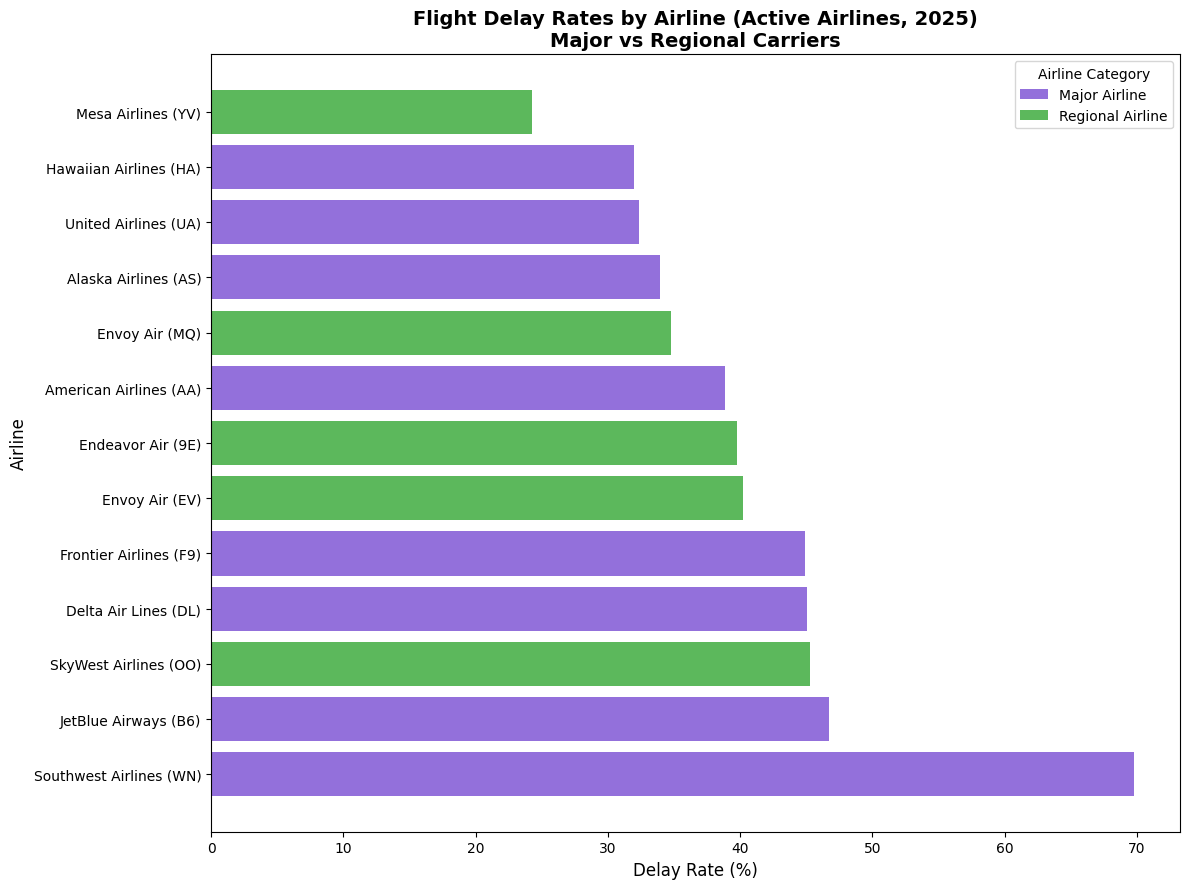

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define major vs regional airlines
major_airlines = ['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'UA', 'WN']
regional_airlines = ['9E', 'EV', 'MQ', 'OO', 'YV']

# Add category column
airline_delay['Category'] = airline_delay.index.map(
    lambda x: 'Major Airline' if x in major_airlines else 'Regional Airline'
)

# Airline full names mapping
airline_names = {
    'AA': 'American Airlines', 'AS': 'Alaska Airlines', 'B6': 'JetBlue Airways',
    'DL': 'Delta Air Lines', 'F9': 'Frontier Airlines', 'HA': 'Hawaiian Airlines',
    'UA': 'United Airlines', 'WN': 'Southwest Airlines', '9E': 'Endeavor Air',
    'EV': 'Envoy Air', 'MQ': 'Envoy Air', 'OO': 'SkyWest Airlines', 'YV': 'Mesa Airlines'
}

# Remove % and convert to float
if pd.api.types.is_string_dtype(airline_delay['Delay_Rate']):
    airline_delay['Delay_Rate_Num'] = airline_delay['Delay_Rate'].str.rstrip('%').astype(float)
else:
    airline_delay['Delay_Rate_Num'] = airline_delay['Delay_Rate'].astype(float)

# Sort by delay rate descending (highest at bottom)
airline_delay_sorted = airline_delay.sort_values('Delay_Rate_Num', ascending=False)

# Create plot
fig, ax = plt.subplots(figsize=(12, 9))

colors = {'Major Airline': '#9370DB', 'Regional Airline': '#5CB85C'}

y_labels = [f"{airline_names.get(code, code)} ({code})" for code in airline_delay_sorted.index]
y_pos = range(len(y_labels))

for i, idx in enumerate(airline_delay_sorted.index):
    category = airline_delay_sorted.loc[idx, 'Category']
    rate = airline_delay_sorted.loc[idx, 'Delay_Rate_Num']
    ax.barh(i, rate, color=colors[category])

ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels)
ax.set_xlabel('Delay Rate (%)', fontsize=12)
ax.set_ylabel('Airline', fontsize=12)
ax.set_title('Flight Delay Rates by Airline (Active Airlines, 2025)\nMajor vs Regional Carriers',
             fontsize=14, fontweight='bold')

# Create legend
legend_elements = [
    Patch(facecolor=colors['Major Airline'], label='Major Airline'),
    Patch(facecolor=colors['Regional Airline'], label='Regional Airline')
]
ax.legend(handles=legend_elements, title='Airline Category', fontsize=10)

plt.tight_layout()
plt.show()

###3.Dayofweek

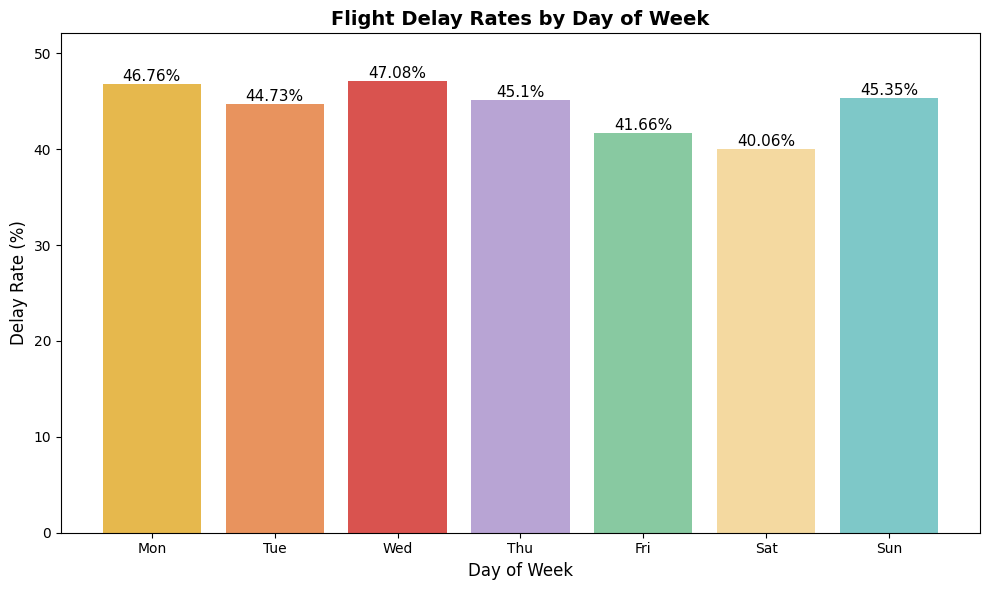

In [92]:
# Remove % and convert back to float
day_delay['Delay_Rate_Num'] = day_delay['Delay_Rate'].str.rstrip('%').astype(float)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#E6B84D', '#E8935E', '#D9534F', '#B8A4D4', '#88C9A1', '#F4D9A0', '#7EC8C8']

bars = ax.bar(day_delay.index, day_delay['Delay_Rate_Num'], color=colors)

# Add percentage labels on top of bars
for bar, rate in zip(bars, day_delay['Delay_Rate']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{rate}', ha='center', va='bottom', fontsize=11)

ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Delay Rate (%)', fontsize=12)
ax.set_title('Flight Delay Rates by Day of Week', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(day_delay['Delay_Rate_Num']) + 5)

plt.tight_layout()
plt.show()

###4.Time Period

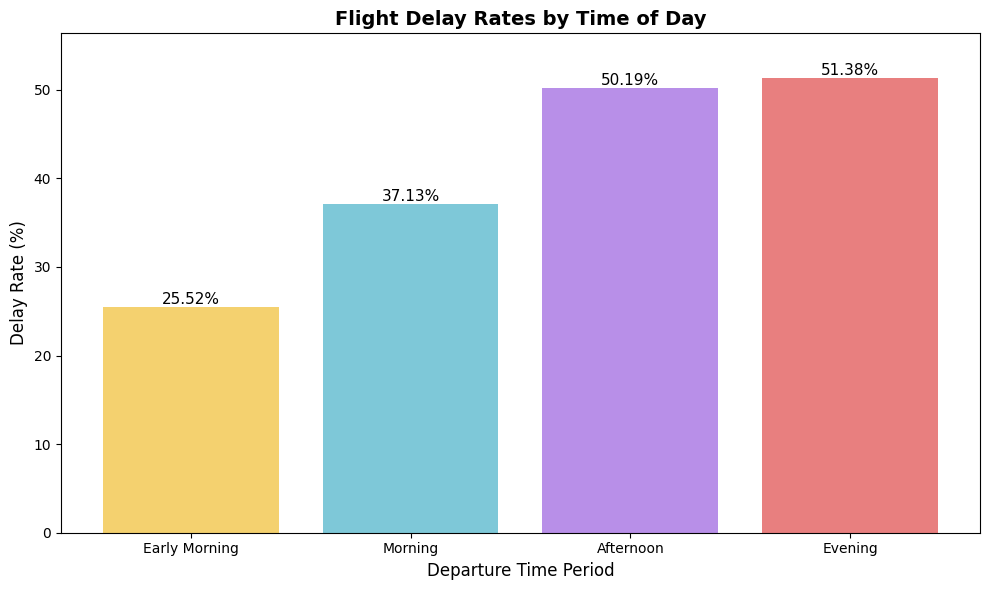

In [93]:
# Time period order
time_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening']

# Remove % and convert back to float
time_delay['Delay_Rate_Num'] = time_delay['Delay_Rate'].str.rstrip('%').astype(float)

# Reindex by time order
time_delay = time_delay.reindex(time_order)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#F4D16F', '#7EC8D8', '#B88FE8', '#E87F7F']

bars = ax.bar(time_delay.index, time_delay['Delay_Rate_Num'], color=colors)

# Add percentage labels on top of bars
for bar, rate in zip(bars, time_delay['Delay_Rate']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{rate}', ha='center', va='bottom', fontsize=11)

ax.set_xlabel('Departure Time Period', fontsize=12)
ax.set_ylabel('Delay Rate (%)', fontsize=12)
ax.set_title('Flight Delay Rates by Time of Day', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(time_delay['Delay_Rate_Num']) + 5)

plt.tight_layout()
plt.show()

###5.Duration

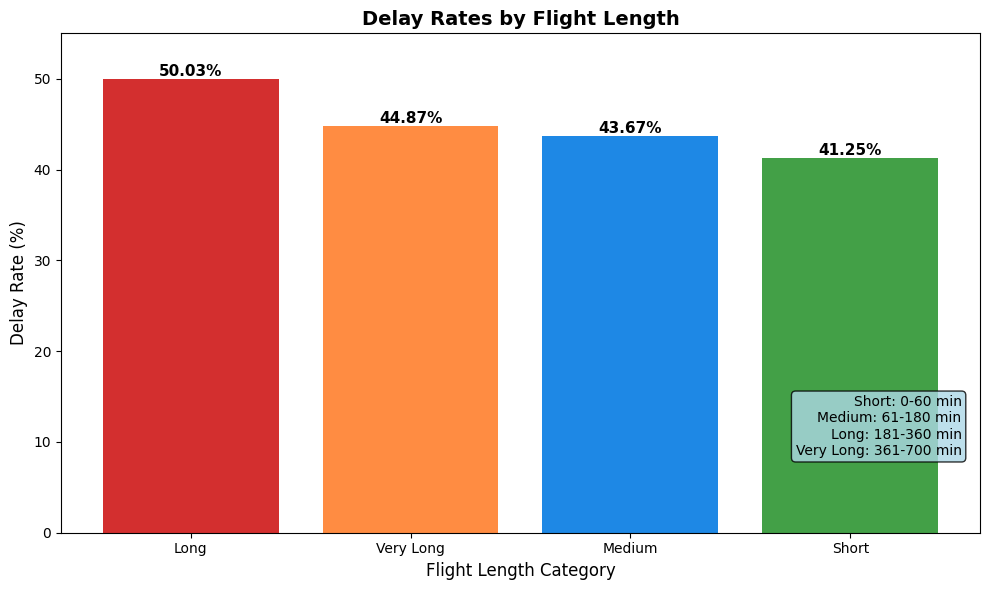

In [94]:
# Flight length order
length_order = ['Short', 'Medium', 'Long', 'Very Long']

# Remove % and convert back to float
length_delay['Delay_Rate_Num'] = length_delay['Delay_Rate'].str.rstrip('%').astype(float)

# Reindex by length order (reversed for descending)
length_delay = length_delay.reindex(['Long', 'Very Long', 'Medium', 'Short'])

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#D32F2F', '#FF8C42', '#1E88E5', '#43A047']

bars = ax.bar(length_delay.index, length_delay['Delay_Rate_Num'], color=colors)

# Add percentage labels on top of bars
for bar, rate in zip(bars, length_delay['Delay_Rate']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{rate}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add legend text
legend_text = 'Short: 0-60 min\nMedium: 61-180 min\nLong: 181-360 min\nVery Long: 361-700 min'
ax.text(0.98, 0.15, legend_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

ax.set_xlabel('Flight Length Category', fontsize=12)
ax.set_ylabel('Delay Rate (%)', fontsize=12)
ax.set_title('Delay Rates by Flight Length', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(length_delay['Delay_Rate_Num']) + 5)

plt.tight_layout()
plt.show()

#Extract the current DF as a csv

In [95]:
print(df)

       Airline  Flight AirportFrom AirportTo  DayOfWeek  departure_minutes  \
0           CO     269         SFO       IAH          3                 15   
1           US    1558         PHX       CLT          3                 15   
2           AA    2400         LAX       DFW          3                 20   
3           AA    2466         SFO       DFW          3                 20   
4           AS     108         ANC       SEA          3                 30   
...        ...     ...         ...       ...        ...                ...   
539378      CO     178         OGG       SNA          5               1439   
539379      FL     398         SEA       ATL          5               1439   
539380      FL     609         SFO       MKE          5               1439   
539381      UA      78         HNL       SFO          5               1439   
539382      US    1442         LAX       PHL          5               1439   

        duration_minutes  departure_delay DayName DepartureForm

In [96]:
df.to_csv('Modified_Airlines.csv', index=False)